%config IPCompleter.greedy=True
# UTSA CS 3793/5233: Assignment-1

Summer 2020


**Gurung - Abit - (jkd175)**


## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies



## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**. 
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, a vaccine was developed and brought to a port city of Texas. The vaccine should be distributed in the fastest way possible to the worst affect city of Texas. Find an **optimal** strategy to distribute the vaccine (Informed Search).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(40 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains straight-line distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [28]:
# Add only your imports here
from math import radians, cos, sin, asin, sqrt
import matplotlib.pyplot as plt
import pprint

In [29]:
drive.mount('/content/drive')
# Load the graph data from the files
# Clearly indicate, with comment, where you are accessing the data files
# Assume that the data files are in the SAME folder as this ipynb file
cities = {}
distances = {}
def midpoint(x1, y1, x2, y2):
    return (x1 + x2) / 2, (y1+y2) / 2

def getItems(items):
    retList = []
    for item in items:
        retList.append(item.strip())
    return retList


def read_cities():
    try:
        with open("/content/drive/My Drive/AI/Assign1/cities.csv") as f:
            lines = f.readlines()
            for line in lines:
                items = line.split(",")
                distances[items[0]] = []
                cities[items[0]] = getItems(items[1:])
    except Exception as e:
        print("Could not open file! \nExiting!", e)
        exit()

read_cities()

# This Method reads the distances file and stores it to a dictionary


def read_distancesFile():
    try:
        with open("/content/drive/My Drive/AI/Assign1/distances.csv") as f:
            lines = f.readlines()
            for line in lines:
                items = line.split(",")
                if items[0] in distances:
                    distances[items[0]].append(getItems(items[1:]))
                else:
                    distances[items[0]] = getItems(items[1:])
                if items[1] in distances:
                    newItem = [items[0], items[2].strip()]
                    distances[items[1]].append(newItem)
                else:
                    newItem = [items[0], items[2].strip()]
                    distances[items[0]] = newItem
    except Exception as e:
        print("Could not open file! \nExiting!", e)
        exit()
    
read_distancesFile()
# pprint.pprint(distances)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


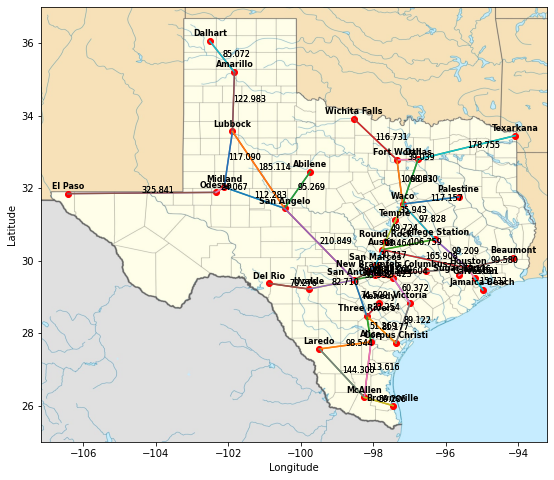

In [30]:
# Display a 2D graph of the given data.
def plot():
    cordsX = []
    cordsY = []
    # Plot
    # plt.figure(figsize=(15, 14))
    img = plt.imread("/content/drive/My Drive/AI/Assign1/texas.jpg")
    fig, ax = plt.subplots()
    ax.imshow(img, extent=[-107.1709, -93.2, 25, 37])
    fig.set_size_inches(11, 8)
    for citi, cordinate in cities.items():
        x = float(cordinate[1])
        y = float(cordinate[0])
        plt.scatter(x, y, c="red")
        plt.annotate(citi,  # this is the text
                     (x, y),  # this is the point to label
                     textcoords="offset points",  # how to position the text
                     xytext=(0, 5),  # distance from text to points (x,y)
                     ha='center', size=8, weight="bold")
        data = distances[citi]
        cordsX.append(x)
        cordsY.append(y)
        # print(citi, data)
        for city in data:
            cord = cities[city[0]]
            cordsX.append(float(cord[1]))
            cordsY.append(float(cord[0]))
            midx, midy = midpoint(x, y, float(cord[1]), float(cord[0]))
            weight = '{:.3f}'.format(float(city[1]))
            plt.text(midx, midy, weight, fontsize=8)
            plt.plot(cordsX, cordsY)
            cordsX.clear()
            cordsY.clear()
            cordsX.append(x)
            cordsY.append(y)
        cordsX.clear()
        cordsY.clear()
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()
plot()


#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

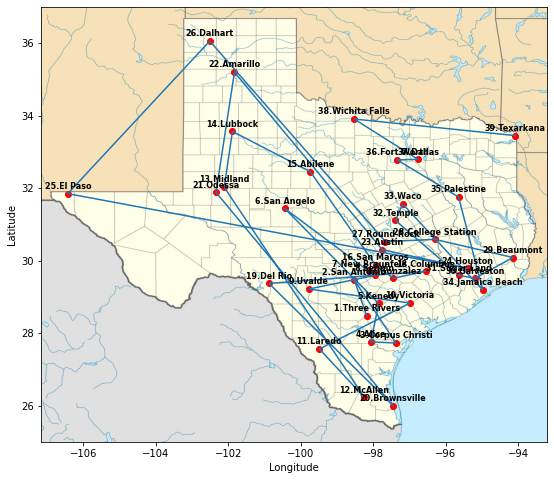

In [31]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
# pprint.pprint(distances)
def BFS(graph, start):
    queue = [start]
    visited = [start]
    while queue:
        node = queue.pop(0)
        edges = distances[node]
        for city in edges:
            if city[0] not in visited:
                visited.append(city[0])
                queue.append(city[0])
    return visited
    
l = BFS(distances, "Three Rivers")

def plotBFS():
    cordsX = []
    cordsY = []
    # Plot
    i = 1
    # plt.figure(figsize=(15, 14))
    img = plt.imread("/content/drive/My Drive/AI/Assign1/texas.jpg")
    fig, ax = plt.subplots()
    ax.imshow(img, extent=[-107.1709, -93.2, 25, 37])
    fig.set_size_inches(11, 8)
    for item in l:
      cords = cities[item]
      x = float(cords[1])
      y = float(cords[0])
      ax.scatter(x, y, c="red")
      ax.annotate(str(i) + "." + item,  # this is the text
                  (x, y),  # this is the point to label
                  textcoords="offset points",  # how to position the text
                  xytext=(0, 5),  # distance from text to points (x,y)
                  ha='center', size=8, weight="bold")
      cordsX.append(x)
      cordsY.append(y)
      i += 1
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    ax.plot(cordsX, cordsY)
plotBFS()

#Vaccine Distribution - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to distribute the vaccine. The vaccine was developed outside US and brought to Texas at the port city of **Corpus Christi**. The goal is to create an **optimal strategy** to distribute the vaccine and make it available at the most affected city **Amarillo**.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print 

*   The path or sequence of cities that will be visited in the optimal vaccine distribution strategy.
*   The total distance travelled in the optimal vaccine distribution strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

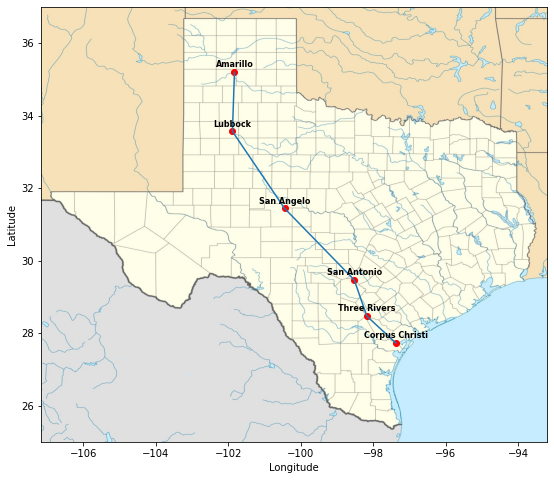

In [32]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'Corpus Chriti' to 'Amarillo'
def calcStrightLineDist(cityCord, end):
    x1, y1, x2, y2 = map(radians, [float(cityCord[1]), float(cityCord[0]), float(
        end[1]), float(end[0])])
    # print(x1, x2, y1, y2)
    dlon = x2 - x1
    dlat = y2 - y1
    a = sin(dlat/2)**2 + cos(y1) * cos(y2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    r = 6371
    return (c * r) / 1.609


def FindEstimateClosest(edges, end):
    end = cities[end]
    closest = 99999
    for city in edges:
        cityCord = cities[city[0]]
        distance = calcStrightLineDist(cityCord, end)
        dist = sqrt(
            (float(cityCord[1]) - float(end[1]))**2 + (float(cityCord[0]) - float(end[0]))**2) + distance
        if(closest > dist):
            closestCity = city[0]
            closest = dist
    return closestCity


def findPath(graph, start, end):
    path = [start]
    q = [start]
    while q:
        edge = q.pop()
        edges = graph[edge]
        closest = FindEstimateClosest(edges, end)
        path.append(closest)
        if(closest == end):
            return path
        q.append(closest)


def plotPath():
    cordsX = []
    cordsY = []
    img = plt.imread("/content/drive/My Drive/AI/Assign1/texas.jpg")
    fig, ax = plt.subplots()
    ax.imshow(img, extent=[-107.1709, -93.2, 25, 37])
    fig.set_size_inches(11, 8)
    routes = findPath(distances, "Corpus Christi", "Amarillo")
    for city in routes:
        cords = cities[city]
        x = float(cords[1])
        y = float(cords[0])
        ax.scatter(x, y, c="red")
        ax.annotate(city,  # this is the text
                    (x, y),  # this is the point to label
                    textcoords="offset points",  # how to position the text
                    xytext=(0, 5),  # distance from text to points (x,y)
                    ha='center', size=8, weight="bold")
        cordsX.append(x)
        cordsY.append(y)
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    ax.plot(cordsX, cordsY)
    plt.show()
plotPath()
drive.flush_and_unmount()

#Submission Instructions



1.   Complete all tasks above.
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard



##Rubric

*   (40 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Distribution - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



